In [6]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2020-08-09 13:02:34--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  5.82MB/s    in 11s     

2020-08-09 13:02:46 (5.10 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [7]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
local_zip = "/tmp/Chessman-image-dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255.0,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [2]:
    import tensorflow as tf
    from tensorflow.keras.layers import Input
    from tensorflow.keras.applications import ResNet50
    from tensorflow.keras.applications import ResNet152V2
    model = tf.keras.models.Sequential([
        ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
        # tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(6, activation='softmax')  
    ])
    model.layers[0].trainable = False

234553344/234545216 [==============================] - 6s 0us/step


In [9]:
    model.compile(optimizer=tf.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

In [10]:
    history = model.fit(train_generator,
                                  validation_data=validation_generator,
                                  epochs=50,
                                  verbose=2)

Epoch 1/50
63/63 - 17s - loss: 13.2336 - accuracy: 0.3768 - val_loss: 3.0517 - val_accuracy: 0.5962
Epoch 2/50
63/63 - 13s - loss: 3.6784 - accuracy: 0.5752 - val_loss: 2.3827 - val_accuracy: 0.5000
Epoch 3/50
63/63 - 13s - loss: 2.0202 - accuracy: 0.6533 - val_loss: 1.4436 - val_accuracy: 0.6923
Epoch 4/50
63/63 - 13s - loss: 1.8559 - accuracy: 0.6293 - val_loss: 0.7506 - val_accuracy: 0.7500
Epoch 5/50
63/63 - 13s - loss: 1.2562 - accuracy: 0.7034 - val_loss: 0.7452 - val_accuracy: 0.7308
Epoch 6/50
63/63 - 13s - loss: 1.4340 - accuracy: 0.6713 - val_loss: 1.2999 - val_accuracy: 0.5962
Epoch 7/50
63/63 - 13s - loss: 1.2995 - accuracy: 0.7114 - val_loss: 0.6550 - val_accuracy: 0.8077
Epoch 8/50
63/63 - 13s - loss: 1.0849 - accuracy: 0.7555 - val_loss: 1.3635 - val_accuracy: 0.6538
Epoch 9/50
63/63 - 13s - loss: 1.5125 - accuracy: 0.7395 - val_loss: 0.6308 - val_accuracy: 0.7308
Epoch 10/50
63/63 - 13s - loss: 1.0902 - accuracy: 0.7615 - val_loss: 1.4837 - val_accuracy: 0.5962
Epoch 11

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history(['accuracy']))

TypeError: ignored

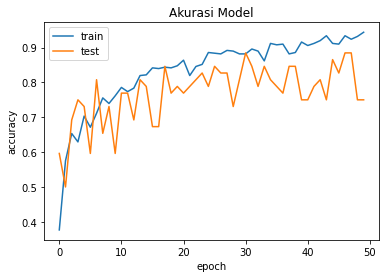

In [14]:
    import matplotlib.pyplot as plt
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Akurasi Model')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

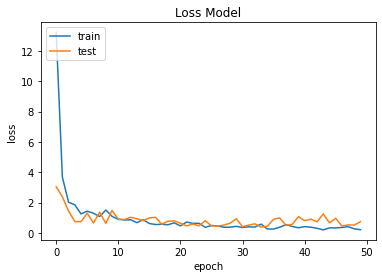

In [15]:
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss Model')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()